# 📌 형태소 분석

### ✏️ 파일 읽기

In [2]:
import os

# 파일 읽기
def read_txt_file(file_name):
  print("[파일명] " + file_name)
  text = ""
  
  # 파일 열기
  with open(file_path + file_name, "r", encoding="UTF8") as txt_file:
    # 파일 라인별로 텍스트만 추출
    for line in txt_file:
      line = line.strip()
      text += line
  return text

file_path = "C:\\Users\\sodud\\study\\ssafy_spec_pjt\\subtitle\\data\\refined_text\\"

# 자막 파일 폴더
file_list = os.listdir(file_path)

# 자막 파일 목록
txt_files = [txt_file for txt_file in file_list]

# 파일 내용 저장할 리스트
text_list = []

# 파일 읽고 내용 저장
for txt_file in txt_files:
  text_list.append(read_txt_file(txt_file))

[파일명] Getter_Robot_Go_001.txt
[파일명] Getter_Robot_Go_002.txt
[파일명] Getter_Robot_Go_003.txt
[파일명] Getter_Robot_Go_004.txt
[파일명] Getter_Robot_Go_005.txt
[파일명] Getter_Robot_Go_006.txt
[파일명] Getter_Robot_Go_007.txt
[파일명] Getter_Robot_Go_008.txt
[파일명] Getter_Robot_Go_009.txt
[파일명] Getter_Robot_Go_010.txt
[파일명] Getter_Robot_Go_011.txt
[파일명] Getter_Robot_Go_012.txt
[파일명] Getter_Robot_Go_013.txt
[파일명] Getter_Robot_Go_014.txt
[파일명] Getter_Robot_Go_015.txt
[파일명] Getter_Robot_Go_016.txt
[파일명] Getter_Robot_Go_017.txt
[파일명] Getter_Robot_Go_018.txt
[파일명] Getter_Robot_Go_019.txt
[파일명] Getter_Robot_Go_020.txt
[파일명] Getter_Robot_Go_021.txt
[파일명] Getter_Robot_Go_022.txt
[파일명] Getter_Robot_Go_023.txt
[파일명] Getter_Robot_Go_024.txt
[파일명] Getter_Robot_Go_025.txt
[파일명] Getter_Robot_Go_026.txt
[파일명] Getter_Robot_Go_027.txt
[파일명] Getter_Robot_Go_028.txt
[파일명] Getter_Robot_Go_029.txt
[파일명] Getter_Robot_Go_030.txt
[파일명] Getter_Robot_Go_031.txt
[파일명] Getter_Robot_Go_032.txt
[파일명] Getter_Robot_Go_033.txt
[파일명] Gett

### ✏️ 불용어 제거

In [3]:
import re

# 불용어 리스트 생성
stop_words = []
with open("stop_words_japanese.txt", "r", encoding="UTF8") as f :
  lines = f.readlines()
  # for stop_word in lines:
  #   stop_words.append(stop_word.strip())
  stop_words = [stop_word.strip() for stop_word in lines]

# 생성된 불용어 리스트 확인
print("불용어: ", stop_words)

불용어:  ['あそこ', 'あっ', 'あの', 'あのかた', 'あの人', 'あり', 'あります', 'ある', 'あれ', 'い', 'いう', 'います', 'いる', 'う', 'うち', 'え', 'お', 'および', 'おり', 'おります', 'か', 'かつて', 'から', 'が', 'き', 'ここ', 'こちら', 'こと', 'この', 'これ', 'これら', 'さ', 'さらに', 'し', 'しかし', 'する', 'ず', 'せ', 'せる', 'そこ', 'そして', 'その', 'その他', 'その後', 'それ', 'それぞれ', 'それで', 'た', 'ただし', 'たち', 'ため', 'たり', 'だ', 'だっ', 'だれ', 'つ', 'て', 'で', 'でき', 'できる', 'です', 'では', 'でも', 'と', 'という', 'といった', 'とき', 'ところ', 'として', 'とともに', 'とも', 'と共に', 'どこ', 'どの', 'な', 'ない', 'なお', 'なかっ', 'ながら', 'なく', 'なっ', 'など', 'なに', 'なら', 'なり', 'なる', 'なん', 'に', 'において', 'における', 'について', 'にて', 'によって', 'により', 'による', 'に対して', 'に対する', 'に関する', 'の', 'ので', 'のみ', 'は', 'ば', 'へ', 'ほか', 'ほとんど', 'ほど', 'ます', 'また', 'または', 'まで', 'も', 'もの', 'ものの', 'や', 'よう', 'より', 'ら', 'られ', 'られる', 'れ', 'れる', 'を', 'ん', '何', '及び', '彼', '彼女', '我々', '特に', '私', '私達', '貴方', '貴方方']


### ✏️ 형태소 분석

In [162]:
import sys
import MeCab

sentence = ""
file_path = "C:\\Users\\sodud\\study\\ssafy_spec_pjt\\subtitle\\data\\refined_text\\"
text = open(file_path + "Getter_Robot_Go_001.txt", "r", encoding="UTF8")
for line in text:
  sentence += line
  
try:
  # 품사 분석
  tagger = MeCab.Tagger()
    
  # 기본 출력 결과
  # print(tagger.parse(sentence))
  
  # 토큰화
  m = tagger.parseToNode(sentence)
  while m:
    feature = m.feature.split(",")
    # print(m.surface, "\t", feature[0])
    m = m.next
  print("EOS")
  
  # 일본어 사전 정보 출력
  d = tagger.dictionary_info()
  while d:
    print("filename: %s" % d.filename)
    print("charset: %s" %  d.charset)
    print("size: %d" %  d.size)
    print("type: %d" %  d.type)
    print("lsize: %d" %  d.lsize)
    print("rsize: %d" %  d.rsize)
    print("version: %d" %  d.version)
    d = d.next


except RuntimeError as e:
    print("RuntimeError:", e)

EOS
filename: C:\Users\sodud\AppData\Roaming\Python\Python39\site-packages\unidic_lite\dicdir\sys.dic
charset: utf8
size: 756264
type: 0
lsize: 5981
rsize: 5981
version: 102


In [164]:
from collections import Counter

# 포함 품사: 명사, 동사, 형용사, 부사, 고유명사
CONTENT_WORD_POS = ("名詞", "動詞", "形容詞", "副詞")
IGNORE = ("接尾", "非自立", "代名詞") # 접미사, 비자립, 대명사, 보조기호

# def is_content_word(feature):
#   return feature.startswith(CONTENT_WORD_POS)
def is_content_word(feature):
    return feature.startswith(CONTENT_WORD_POS) and all(f not in IGNORE for f in feature.split(",")[:6])


content_words = []

for text in text_list:
  
  # 토큰화
  m = tagger.parseToNode(text)
  
  while m:
    # 해당되는 단어만 뽑기
    if is_content_word(m.feature):
      word = m.feature.split(",")[6] if len(m.feature.split(",")) > 6 and m.feature.split(",")[6] != "*" else m.surface
      if word not in stop_words:
        content_words.append((word))
    m = m.next

# 빈도수 계산
count = Counter(content_words)

# 단어와 빈도수 딕셔너리 저장 리스트
word_count = []
words = []

for word, cnt in count.most_common():
  dics = {"word": word, "count": cnt}
  if len(dics["word"]) >= 2 and len(words) <= 99:
    word_count.append(dics)
    words.append(dics["word"])

# 단어, 빈도수 출력
# for word in word_count:
#   print("{}\t{}".format(word["word"], word["count"]))

print(word_count)
# print(words)
# print(len(words))

[{'word': 'スル', 'count': 1794}, {'word': 'ゲッター', 'count': 1075}, {'word': 'ショウ', 'count': 871}, {'word': 'ナイ', 'count': 574}, {'word': 'イル', 'count': 514}, {'word': 'ロボ', 'count': 472}, {'word': 'ドウ', 'count': 451}, {'word': 'ナル', 'count': 444}, {'word': 'コト', 'count': 443}, {'word': 'ヤル', 'count': 426}, {'word': 'イウ', 'count': 408}, {'word': 'ヨイ', 'count': 374}, {'word': 'ワン', 'count': 361}, {'word': 'メタル', 'count': 360}, {'word': 'ビースト', 'count': 359}, {'word': 'イク', 'count': 321}, {'word': 'ハカセ', 'count': 307}, {'word': 'クル', 'count': 306}, {'word': 'ワカル', 'count': 294}, {'word': 'アル', 'count': 290}, {'word': 'タチバナ', 'count': 280}, {'word': 'クレル', 'count': 246}, {'word': 'ソウ', 'count': 244}, {'word': 'ﾔｼｬ', 'count': 221}, {'word': 'ミル', 'count': 199}, {'word': 'ヤツ', 'count': 199}, {'word': 'ウッ', 'count': 198}, {'word': 'アニ', 'count': 196}, {'word': 'デキル', 'count': 187}, {'word': 'モウ', 'count': 178}, {'word': 'ニャー', 'count': 171}, {'word': 'イマ', 'count': 169}, {'word': 'チェンジ', 'count

In [166]:
counts = []
for i in word_count:
  # print(i["count"])
  counts.append(i["word"])

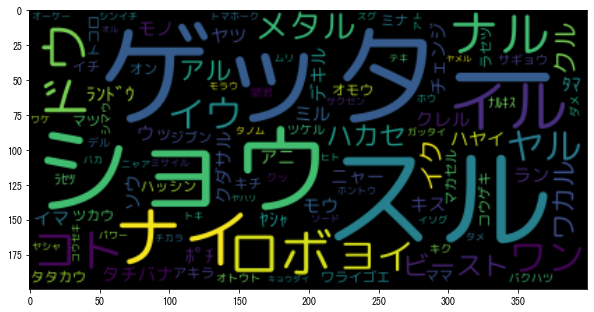

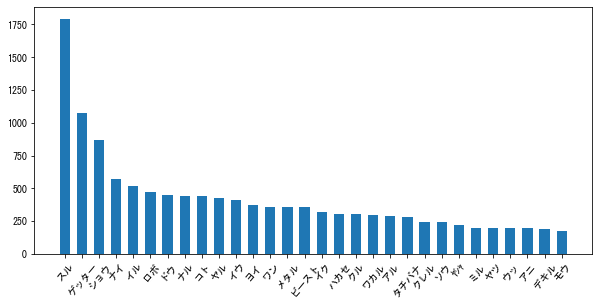

<Figure size 720x720 with 0 Axes>

In [177]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from wordcloud import WordCloud

# 폰트 경로 설정
font_path = "C:/Users/sodud/study/ssafy_spec_pjt/subtitle/MPLUSRounded1c-Regular.ttf"

# 딕셔너리화
def pairing_word_cnt(word_count):
  wordInfo = dict()
  for i in word_count:
    wordInfo[i["word"]] = i["count"]
  return wordInfo

# 데이터 시각화(막대 그래프)
def show_bar_chart(font_path, data):
  # 폰트 설정
  font_name = fm.FontProperties(fname="C:/Windows/Fonts/msgothic.ttc").get_name()
  plt.rc("font", family=font_name)
  
  # 30개씩의 데이터만
  x = list(data.keys())[:30]
  y = list(data.values())[:30]
  
  # 그래프 비율
  ax = plt.subplot(2, 1, 1)
  
  # 막대 설정
  plt.bar(x, y, width=.6)
  
  # x축 레이블 설정
  plt.xticks(fontsize=10, rotation=50)
  
  # 그래프 이미지 사이즈 설정
  plt.figure(figsize=(10, 10))
  plt.show()

# 데이터 시각화(워드 클리우드)
def show_wordcloud(font_path, data):
  # wordcloud = WordCloud(font_path).generate(" ".join(data))
  wordcloud = WordCloud(font_path).generate(" ".join(data))
  plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.show()

show_wordcloud(font_path, words)
show_bar_chart(font_path, pairing_word_cnt(word_count))